# Tutorial on how to work on the dataset (Maestro)

In [10]:
# Import standard libraries
import sys
from pathlib import Path
# For audio and MIDI processing
import pretty_midi
import IPython
# For numerical processing
import numpy as np

# Import this project modules
REPO_ROOT = Path('.').resolve().parent
if REPO_ROOT not in sys.path:
    sys.path.insert(0, str(REPO_ROOT))
from src.utils.visualization import display_prettymidi

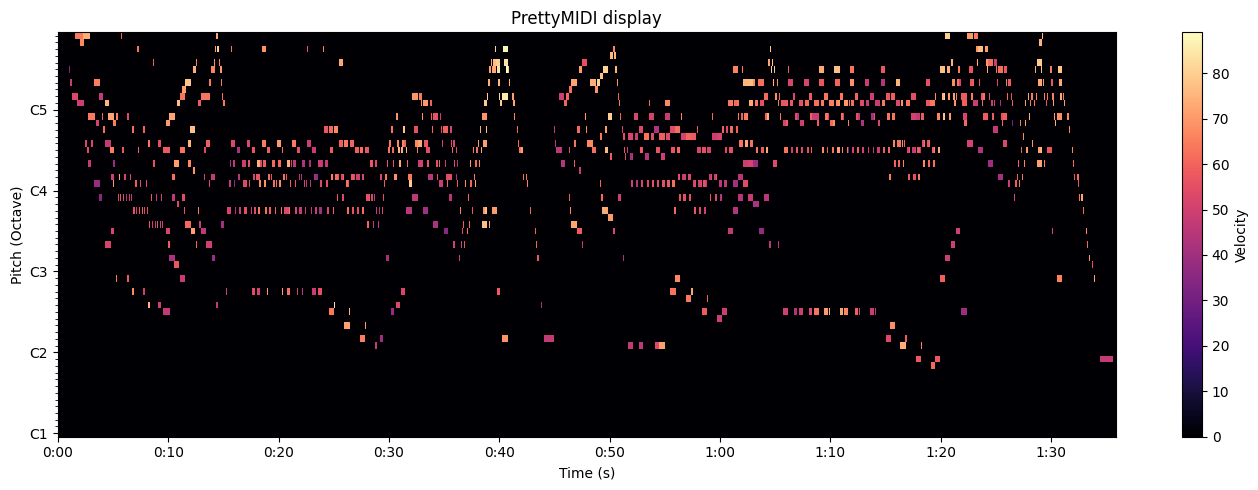

In [11]:
# We'll load in the example.mid file distributed with pretty_midi
pm = pretty_midi.PrettyMIDI("../data/maestro-v3.0.0/2009/MIDI-Unprocessed_01_R1_2009_01-04_ORIG_MID--AUDIO_01_R1_2009_01_R1_2009_01_WAV.midi")

display_prettymidi(pm, fs=100, pitch_range=(24, 84))

## Instrument composition

Ogni strumento è associato a un program number. I program numbers [0, 1, 2, 3, 4, 5, 6, 7] sono quelli associati al pianoforte. Tuttavia, a volte lo stesso program number può corrispondere a una traccia di batteria, nel qual caso il flag `instr.is_drum` è True.

In [12]:
widths = [14, 25, 27]
print(f'{"Program number":<{widths[0]}} | {"Instrument":<{widths[1]}} | {"Class":<{widths[2]}}')
print('-' * sum(widths))

for i in range(128):
    instrument_name = pretty_midi.program_to_instrument_name(i)
    instrument_class = pretty_midi.program_to_instrument_class(i)
    print(f'{i:<{widths[0]}} | {instrument_name:<{widths[1]}} | {instrument_class:<{widths[2]}}')

Program number | Instrument                | Class                      
------------------------------------------------------------------
0              | Acoustic Grand Piano      | Piano                      
1              | Bright Acoustic Piano     | Piano                      
2              | Electric Grand Piano      | Piano                      
3              | Honky-tonk Piano          | Piano                      
4              | Electric Piano 1          | Piano                      
5              | Electric Piano 2          | Piano                      
6              | Harpsichord               | Piano                      
7              | Clavinet                  | Piano                      
8              | Celesta                   | Chromatic Percussion       
9              | Glockenspiel              | Chromatic Percussion       
10             | Music Box                 | Chromatic Percussion       
11             | Vibraphone                | Chromatic Pe

In [13]:
# print information about each instrument in the MIDI file
for instr in pm.instruments: 
    print(instr)

Instrument(program=0, is_drum=False, name="")


## How to extract only piano track

In [14]:
piano_instruments = [instr for instr in pm.instruments 
                        if instr.program in [0, 1, 2, 3, 4, 5, 6, 7] and not instr.is_drum]

# Print selectded piano instruments
for instr in piano_instruments:
    print(instr)

Instrument(program=0, is_drum=False, name="")


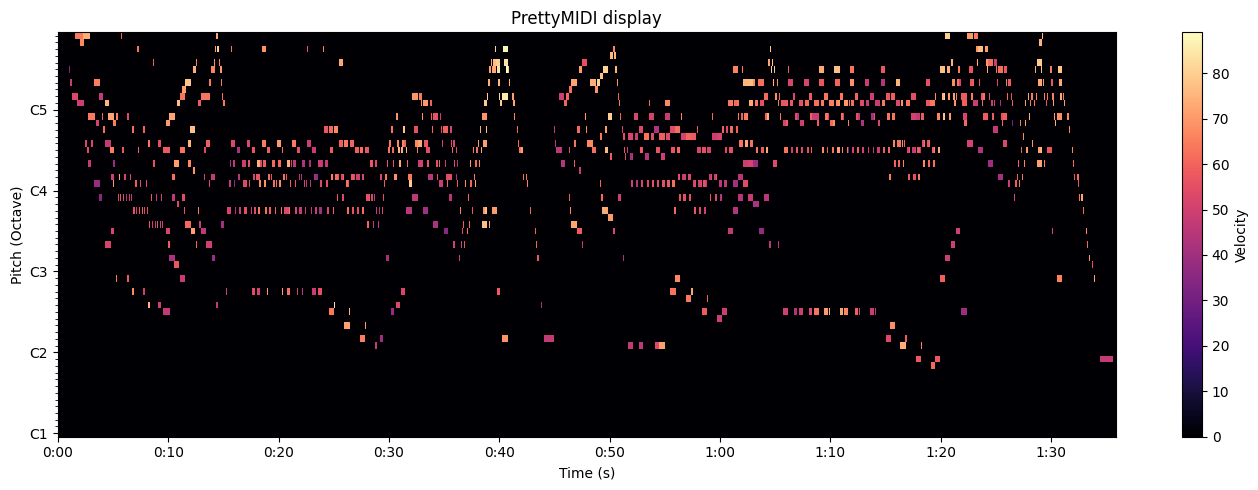

(array([0.]), array([120.]))


In [15]:
pm_piano = pretty_midi.PrettyMIDI()
for piano_instr in piano_instruments:
    pm_piano.instruments.append(piano_instr)

if len(pm_piano.instruments) != 0:
    display_prettymidi(pm_piano, fs=100, pitch_range=(24, 84))
    audio = IPython.display.Audio(pm_piano.fluidsynth(fs=16000), rate=16000)
    IPython.display.display(audio)

    print(pm_piano.get_tempo_changes())
else:
    print("No piano instruments found in this MIDI file.")

## Extract midi file in matrix form

Il piano roll ha le seguenti caratteristiche:

- 128 righe che corrispondono alle note MIDI totali e colonne che rappresentano intervalli temporali.
- Ogni riga corrisponde a una nota MIDI specifica (tutti i 12 semitoni su più ottave).
- Il valore in ogni cella indica velocità (velocity) della nota.
- Permette la ricostruzione precisa e dettagliata della melodia, durata e dinamica delle note.

In [16]:
fs = 100  # sampling rate per second

piano_roll = pm_piano.get_piano_roll(fs)

print("Piano-roll shape:", piano_roll.shape)
n_pitches, n_frames = piano_roll.shape
duration_seconds = n_frames / fs
print(f"Duration (s): {duration_seconds:.2f}, frames: {n_frames}, fs: {fs}")

np.set_printoptions(threshold=sys.maxsize, linewidth=sys.maxsize )
print(piano_roll[:, fs*50:51*fs])
np.set_printoptions()

Piano-roll shape: (128, 9586)
Duration (s): 95.86, frames: 9586, fs: 100
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.